In [1]:
import matplotlib.pyplot as plt
import numpy as np
arr = np.random.rand(30)
plt.plot(arr)
import pymnet as mn
import networkx as nx

In [134]:
def convert_graph(M, layer, G):
    if not(layer in M.get_layers()):
        print("Layer not found")
        return
    
    for i in G.edges():
        M[i[0], i[1], layer, layer] = 1

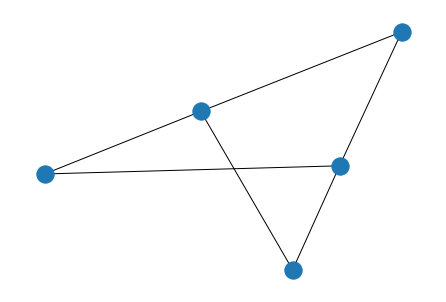

In [231]:
N = 5
av_degree = 4
m = int(av_degree/2)
GBA = nx.barabasi_albert_graph(N, m)
nx.draw(GBA)

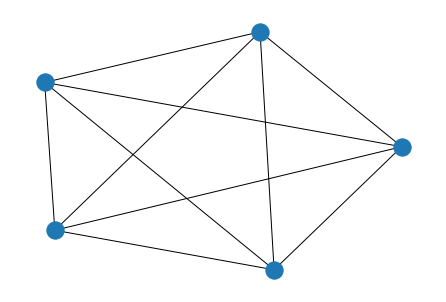

In [232]:
N = 5
av_degree = 6
p = av_degree/(N-1)
GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
nx.draw(GER)
nx.write_adjlist(GER, "test.adjlist")

In [248]:
net = mn.MultilayerNetwork(aspects=1)
net.add_layer('a')
net.add_layer('b')
#net.add_layer('c')

In [249]:
convert_graph(net, 'a', GBA)
convert_graph(net, 'b', GER)
#convert_graph(net, 'c', GER)

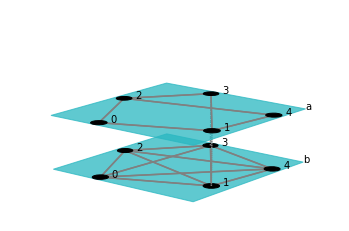

In [250]:
net[1,1,'a','b'] = 1
#net[1,1,'a','c'] = 3
net[3,3, 'a','b'] = 1
fig = mn.draw(net)

In [218]:
for i in net[1, 1, 'b', :]:
    print(i)

(1, 'a')


In [168]:
len(net)

4

In [229]:
d = {'a':1, 'b':2, 'c':3}
d[:]=0

TypeError: unhashable type: 'slice'

In [253]:
# function to simulate the SIR dynamics starting from a single seed node
def SIR_single_seed(G, seed, beta=0.3, mu=1):    
    def find(v, i): # function to find the positions of element i in vector v
        arr = []
        for l in v:
            pos = 0
            for x in v[l]:
                if(x == i):
                    arr.append((pos, l))
                pos = pos + 1
        return arr
    
    N = len(G)
    #Reactive process: SIR dynamics
    seed_nodes = seed; # seed node
    vector_states = {}
    for i in G.get_layers():
        vector_states[i] = np.zeros(N) # vector that stores the states of the vertices]
        
    for i in seed_nodes:    
        vector_states[i[0]][i[1]] = 1 # vector that stores the states
    ninfected = len(seed_nodes)
    t = 0 # start in t= 0 
    infected = list() # this list stores the infected nodes at each step
    vt = list() # this list stores the time step
    vI = list() # this list stores the fraction of infected nodes
    vR = list() # this list stores the fraction of recovered nodes
    vS = list() # this list stores the fraction of susceptible nodes
    # Reactive model simulation
    
    while ninfected > 0: # Simulate while we can find infected nodes
        infected = find(vector_states,1) # list of infected nodes
        print(vector_states)
        
        for i in infected: # try to infect the neighbors
            print(f"infected: {i}")
            #iterate in layer neighbors
            print("\tneighbors:")
            for j in G[i[0],:,i[1],i[1]]:
                print(f"\t{j}")
                if np.random.rand() < beta:
                    if(vector_states[j[1]][j[0]] != 2): # verify if the node is not recovered
                        vector_states[j[1]][j[0]] = 1
                        
            #iterate for the same person in all layers
            print("\tcouple:")
            for j in G[i[0], i[0], i[1], :]:
                print(f"\t{j}")
                if np.random.rand() < G[i[0], j[0], i[1], j[1]]:
                    vector_states[j[1]][j[0]] = 1
                                    
        for k in infected: # try to recover the infected nodes
            if np.random.rand() < mu:
                for lay in G.get_layers():
                    vector_states[lay][k[0]] = 2
                    
        ninfected = len(find(vector_states,1))
        vI.append(ninfected/N)
        vR.append(len(find(vector_states,2))/N)
        vS.append(len(find(vector_states,0))/N)
        t = t + 1
        vt.append(t)
    print(vector_states)
    return vI, vS, vR, vt

{'b': array([0., 0., 0., 0., 0.]), 'a': array([1., 0., 0., 0., 0.])}
infected: (0, 'a')
	neighbors:
	(1, 'a')
	(2, 'a')
	couple:
{'b': array([0., 0., 0., 0., 0.]), 'a': array([1., 1., 1., 0., 0.])}
infected: (0, 'a')
	neighbors:
	(1, 'a')
	(2, 'a')
	couple:
infected: (1, 'a')
	neighbors:
	(0, 'a')
	(3, 'a')
	(4, 'a')
	couple:
	(1, 'b')
infected: (2, 'a')
	neighbors:
	(0, 'a')
	(3, 'a')
	(4, 'a')
	couple:
{'b': array([2., 1., 0., 0., 0.]), 'a': array([2., 1., 1., 1., 1.])}
infected: (1, 'b')
	neighbors:
	(0, 'b')
	(2, 'b')
	(3, 'b')
	(4, 'b')
	couple:
	(1, 'a')
infected: (1, 'a')
	neighbors:
	(0, 'a')
	(3, 'a')
	(4, 'a')
	couple:
	(1, 'b')
infected: (2, 'a')
	neighbors:
	(0, 'a')
	(3, 'a')
	(4, 'a')
	couple:
infected: (3, 'a')
	neighbors:
	(1, 'a')
	(2, 'a')
	couple:
	(3, 'b')
infected: (4, 'a')
	neighbors:
	(1, 'a')
	(2, 'a')
	couple:
{'b': array([2., 1., 1., 2., 2.]), 'a': array([2., 1., 1., 2., 2.])}
infected: (1, 'b')
	neighbors:
	(0, 'b')
	(2, 'b')
	(3, 'b')
	(4, 'b')
	couple:
	(1,

/tmp/ipykernel_307/956291448.py:14: MatplotlibDeprecationWarning: Passing the block parameter of show() positionally is deprecated since Matplotlib 3.1; the parameter will become keyword-only in 3.3.
  plt.show(True)


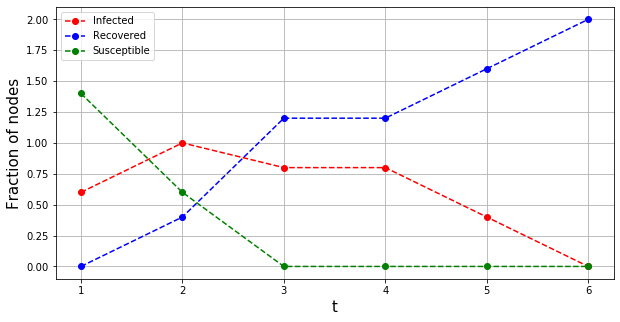

In [256]:
beta = 0.5 # Probability of infection
mu = 0.5  # Probability of recovering
seed = [('a', 0)]
vI, vS, vR, vt = SIR_single_seed(net,seed, beta, mu)
    
plt.figure(figsize=(10,5))
plt.plot(vt, vI, 'ro--', label='Infected')
plt.plot(vt, vR, 'bo--', label='Recovered')
plt.plot(vt, vS, 'go--', label='Susceptible')
plt.xlabel("t", fontsize=15)
plt.ylabel("Fraction of nodes", fontsize=15)
plt.legend()
plt.grid(True)
plt.show(True)